In [35]:
import numpy as np # 导入NumPy数学工具箱
import pandas as pd # 导入Pandas数据处理工具箱
df_heart = pd.read_csv("../input/heart-dataset/heart.csv")  # 读取文件
df_heart.head() # 显示前5行数据

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


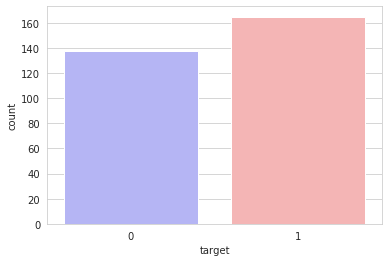

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns #导入seaborn画图工具箱
sns.countplot(x="target", data=df_heart, palette="bwr")
plt.show()

In [37]:
# 将某些特征转换为数值类型的哑变量
a = pd.get_dummies(df_heart['cp'], prefix = "cp")
b = pd.get_dummies(df_heart['thal'], prefix = "thal")
c = pd.get_dummies(df_heart['slope'], prefix = "slope")
frames = [df_heart, a, b, c]
df_heart = pd.concat(frames, axis = 1)
df_heart.head()
df_heart = df_heart.drop(columns = ['cp', 'thal', 'slope'])
df_heart.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [38]:
# 构建特征和标签集
y = df_heart.target.values
X = df_heart.drop(['target'], axis = 1)

In [39]:
from sklearn.model_selection import train_test_split # 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [40]:
# 进行特征缩放
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
from sklearn.neighbors import KNeighborsClassifier # 导入kNN算法
k = 5 # 设定初始K值为5
kNN = KNeighborsClassifier(n_neighbors = k)  # kNN模型
kNN.fit(X_train, y_train) # 拟合kNN模型
y_pred = kNN.predict(X_test) # 预测心脏病结果
from sklearn.metrics import (accuracy_score, f1_score, average_precision_score, confusion_matrix) # 导入评估标准
print("{}NN 预测准确率: {:.2f}%".format(k, kNN.score(X_test, y_test)*100))
print("{}NN 预测F1分数: {:.2f}%".format(k, f1_score(y_test, y_pred)*100))
print('kNN 混淆矩阵:\n', confusion_matrix(y_pred, y_test))

5NN 预测准确率: 85.25%
5NN 预测F1分数: 86.15%
kNN 混淆矩阵:
 [[24  6]
 [ 3 28]]


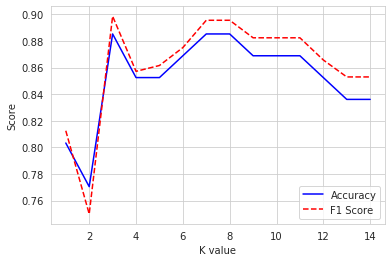

Maximum kNN Score is 89.86%


In [42]:
# 寻找最佳K值
f1_score_list = []
acc_score_list = []
for i in range(1,15):
    kNN = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    kNN.fit(X_train, y_train)
    acc_score_list.append(kNN.score(X_test, y_test))
    y_pred = kNN.predict(X_test) # 预测心脏病结果
    f1_score_list.append(f1_score(y_test, y_pred))
index = np.arange(1,15,1)
plt.plot(index,acc_score_list,c='blue',linestyle='solid')
plt.plot(index,f1_score_list,c='red',linestyle='dashed')
plt.legend(["Accuracy", "F1 Score"])
plt.xlabel("K value")
plt.ylabel("Score")
plt.grid('false')
plt.show()
kNN_acc = max(f1_score_list)*100
print("Maximum kNN Score is {:.2f}%".format(kNN_acc))

In [43]:
from sklearn.svm import SVC # 导入SVM分类器
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test) # 预测心脏病结果
svm_acc = svm.score(X_test,y_test)*100
print("SVM 预测准确率:: {:.2f}%".format(svm.score(X_test,y_test)*100))
print("SVM 预测F1分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
print('SVM 混淆矩阵:\n', confusion_matrix(y_pred, y_test))

SVM 预测准确率:: 88.52%
SVM 预测F1分数: 89.86%
SVM 混淆矩阵:
 [[23  3]
 [ 4 31]]


In [44]:
from sklearn.naive_bayes import GaussianNB # 导入朴素贝叶斯模型
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test) # 预测心脏病结果
nb_acc = nb.score(X_test,y_test)*100
print("NB 预测准确率:: {:.2f}%".format(svm.score(X_test,y_test)*100))
print("NB 预测F1分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
print('NB 混淆矩阵:\n', confusion_matrix(y_pred, y_test))

NB 预测准确率:: 88.52%
NB 预测F1分数: 88.24%
NB 混淆矩阵:
 [[23  4]
 [ 4 30]]


In [45]:
from sklearn.tree import DecisionTreeClassifier # 导入决策树分类器
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_acc = dtc.score(X_test, y_test)*100
y_pred = dtc.predict(X_test) # 预测心脏病结果
print("Decision Tree Test Accuracy {:.2f}%".format(dtc_acc))
print("决策树 预测准确率:: {:.2f}%".format(dtc.score(X_test, y_test)*100))
print("决策树 预测F1分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
print('决策树 混淆矩阵:\n', confusion_matrix(y_pred, y_test))

Decision Tree Test Accuracy 78.69%
决策树 预测准确率:: 78.69%
决策树 预测F1分数: 80.00%
决策树 混淆矩阵:
 [[22  8]
 [ 5 26]]


In [46]:
from sklearn.ensemble import RandomForestClassifier # 导入随机森林分类器
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
rf_acc = rf.score(X_test,y_test)*100
y_pred = rf.predict(X_test) # 预测心脏病结果
print("随机森林 预测准确率:: {:.2f}%".format(rf.score(X_test, y_test)*100))
print("随机森林 预测F1分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))

print('随机森林 混淆矩阵:\n', confusion_matrix(y_pred, y_test))

随机森林 预测准确率:: 88.52%
随机森林 预测F1分数: 89.86%
随机森林 混淆矩阵:
 [[23  3]
 [ 4 31]]


In [47]:
from sklearn.linear_model import LogisticRegression # 导入逻辑回归模型
lr = LogisticRegression()
lr.fit(X_train,y_train) 
y_pred = lr.predict(X_test) # 预测心脏病结果
lr_acc = lr.score(X_test,y_test)*100 
lr_f1 = f1_score(y_test, y_pred)*100 
print("逻辑回归测试集准确率： {:.2f}%".format(lr_acc))
print("逻辑回归测试集F1分数: {:.2f}%".format(lr_f1))
print('逻辑回归测试集混淆矩阵:\n', confusion_matrix(y_test,y_pred))

逻辑回归测试集准确率： 86.89%
逻辑回归测试集F1分数: 88.24%
逻辑回归测试集混淆矩阵:
 [[23  4]
 [ 4 30]]


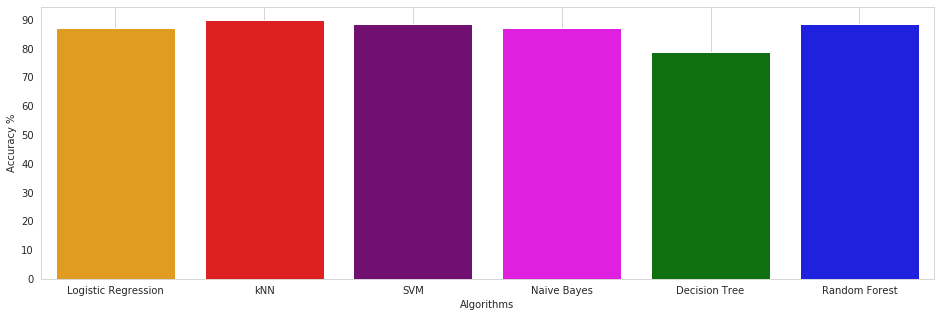

In [48]:
methods = ["Logistic Regression", "kNN", "SVM", 
           "Naive Bayes", "Decision Tree", "Random Forest"]
accuracy = [lr_acc, kNN_acc, svm_acc, nb_acc, dtc_acc, rf_acc]
colors = ["orange","red","purple", "magenta", "green","blue"]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.grid(b=None)
plt.show()

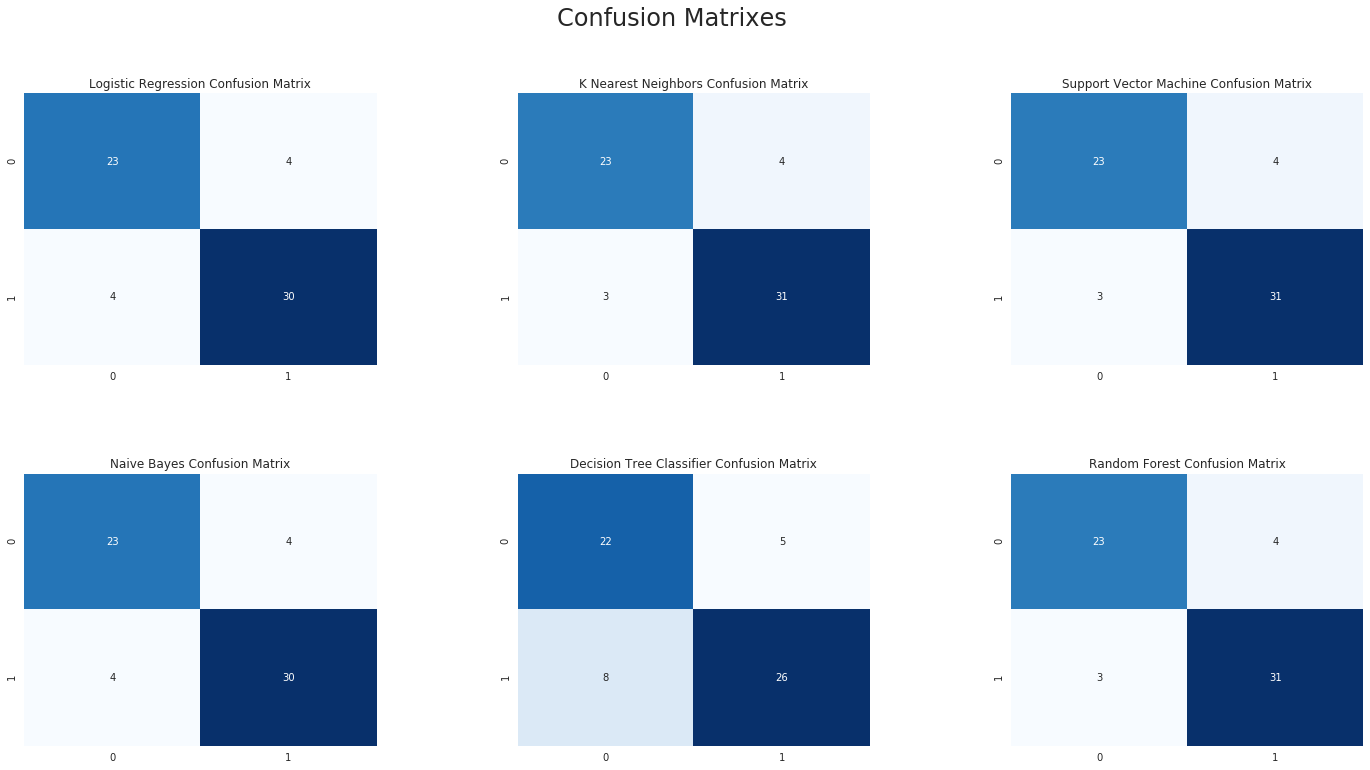

In [49]:
# 绘制各算法的混淆矩阵
from sklearn.metrics import confusion_matrix
y_pred_lr = lr.predict(X_test)
kNN3 = KNeighborsClassifier(n_neighbors = 3)
kNN3.fit(X_train, y_train)
y_pred_kNN = kNN3.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_dtc = dtc.predict(X_test)
y_pred_rf = rf.predict(X_test)
cm_lr = confusion_matrix(y_test,y_pred_lr)
cm_kNN = confusion_matrix(y_test,y_pred_kNN)
cm_svm = confusion_matrix(y_test,y_pred_svm)
cm_nb = confusion_matrix(y_test,y_pred_nb)
cm_dtc = confusion_matrix(y_test,y_pred_dtc)
cm_rf = confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(24,12))
plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_kNN,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

In [50]:
from sklearn.model_selection import StratifiedKFold # 导入K折验证工具
from sklearn.model_selection import GridSearchCV # 导入网格搜索工具
kfold = StratifiedKFold(n_splits=10) # 10折验证
rf = RandomForestClassifier() # 随机森林
# 对随机森林算法进行参数优化
rf_param_grid = {"max_depth": [None],
              "max_features": [3, 5, 12],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [3, 5, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}
rf_gs = GridSearchCV(rf,param_grid = rf_param_grid, cv=kfold, 
                    scoring="accuracy", n_jobs= 10, verbose = 1)
rf_gs.fit(X_train, y_train) # 用优化后的参数拟合训练数据集

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    6.9s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   25.9s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   59.5s
[Parallel(n_jobs=10)]: Done 540 out of 540 | elapsed:  1.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2...
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_s

In [51]:
from sklearn.metrics import (accuracy_score, confusion_matrix)
y_hat_rfgs = rf_gs.predict(X_test) # 用随机森林算法的最佳参数进行预测
print("参数优化后随机森林测试准确率:", accuracy_score(y_test.T, y_hat_rfgs))

参数优化后随机森林测试准确率: 0.8852459016393442


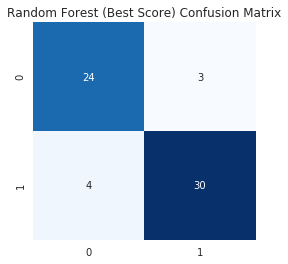

In [52]:
cm_rfgs = confusion_matrix(y_test,y_hat_rfgs) # 显示混淆矩阵
plt.figure(figsize=(4,4))
plt.title("Random Forest (Best Score) Confusion Matrix")
sns.heatmap(cm_rfgs,annot=True,cmap="Blues",fmt="d",cbar=False)

In [53]:
print("最佳参数组合:",rf_gs.best_params_)

最佳参数组合: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 300}
